In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import classify
import mcc
import datasets

In [76]:
# X, y = datasets.multiclass()
# X, y = datasets.iris()
# X, y = datasets.murphy281()
X, y = datasets.htwt()

In [68]:
import nb
import lda
import qda
import rda
import nsc
import irls
import logistic
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import NearestCentroid
import statsmodels.api as sm

In [19]:
clf = BernoulliNB()
clf = nb.bernoulli()
clf = GaussianNB()
clf = nb.gaussian()
clf = rda.Classifier()
clf = NearestCentroid()
clf = nsc.Classifier()
clf = LDA()
clf = lda.Classifier()
clf = qda.Classifier()
clf = QDA()
clf = irls.Classifier()
clf = LogisticRegression()
clf = logistic.Classifier()

In [74]:
fit = sm.Logit(y, sm.add_constant(X)).fit_regularized(disp = 0)
p = fit.predict(sm.add_constant(X))
yhat = (p > 0.5) * 1
print '%0.3f' % np.mean(np.mean(yhat != y))

0.119


In [57]:
clf = logistic.Classifier()

clf.fit(X, y)
print '%0.3f' % np.mean(np.mean(clf.predict(X) != y))

0.119


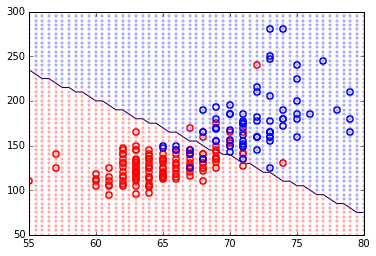

In [29]:
classify.show_points(X, y)
classify.show_regions(clf, X)
# classify.show_contour(clf, X)
plt.show()